<a href="https://colab.research.google.com/github/2303A51142/AIML-2025BT17-18/blob/main/Aiml_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1


In [56]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [57]:
print(data.dtypes)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [4]:
summary_stats = data.describe(percentiles=[.25, .5, .75, .9])
print(summary_stats)


          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
90%     -117.240000     38.480000           46.000000   4677.100000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.00

In [5]:
columns = data.columns
print("Features in the dataset:", columns)


Features in the dataset: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


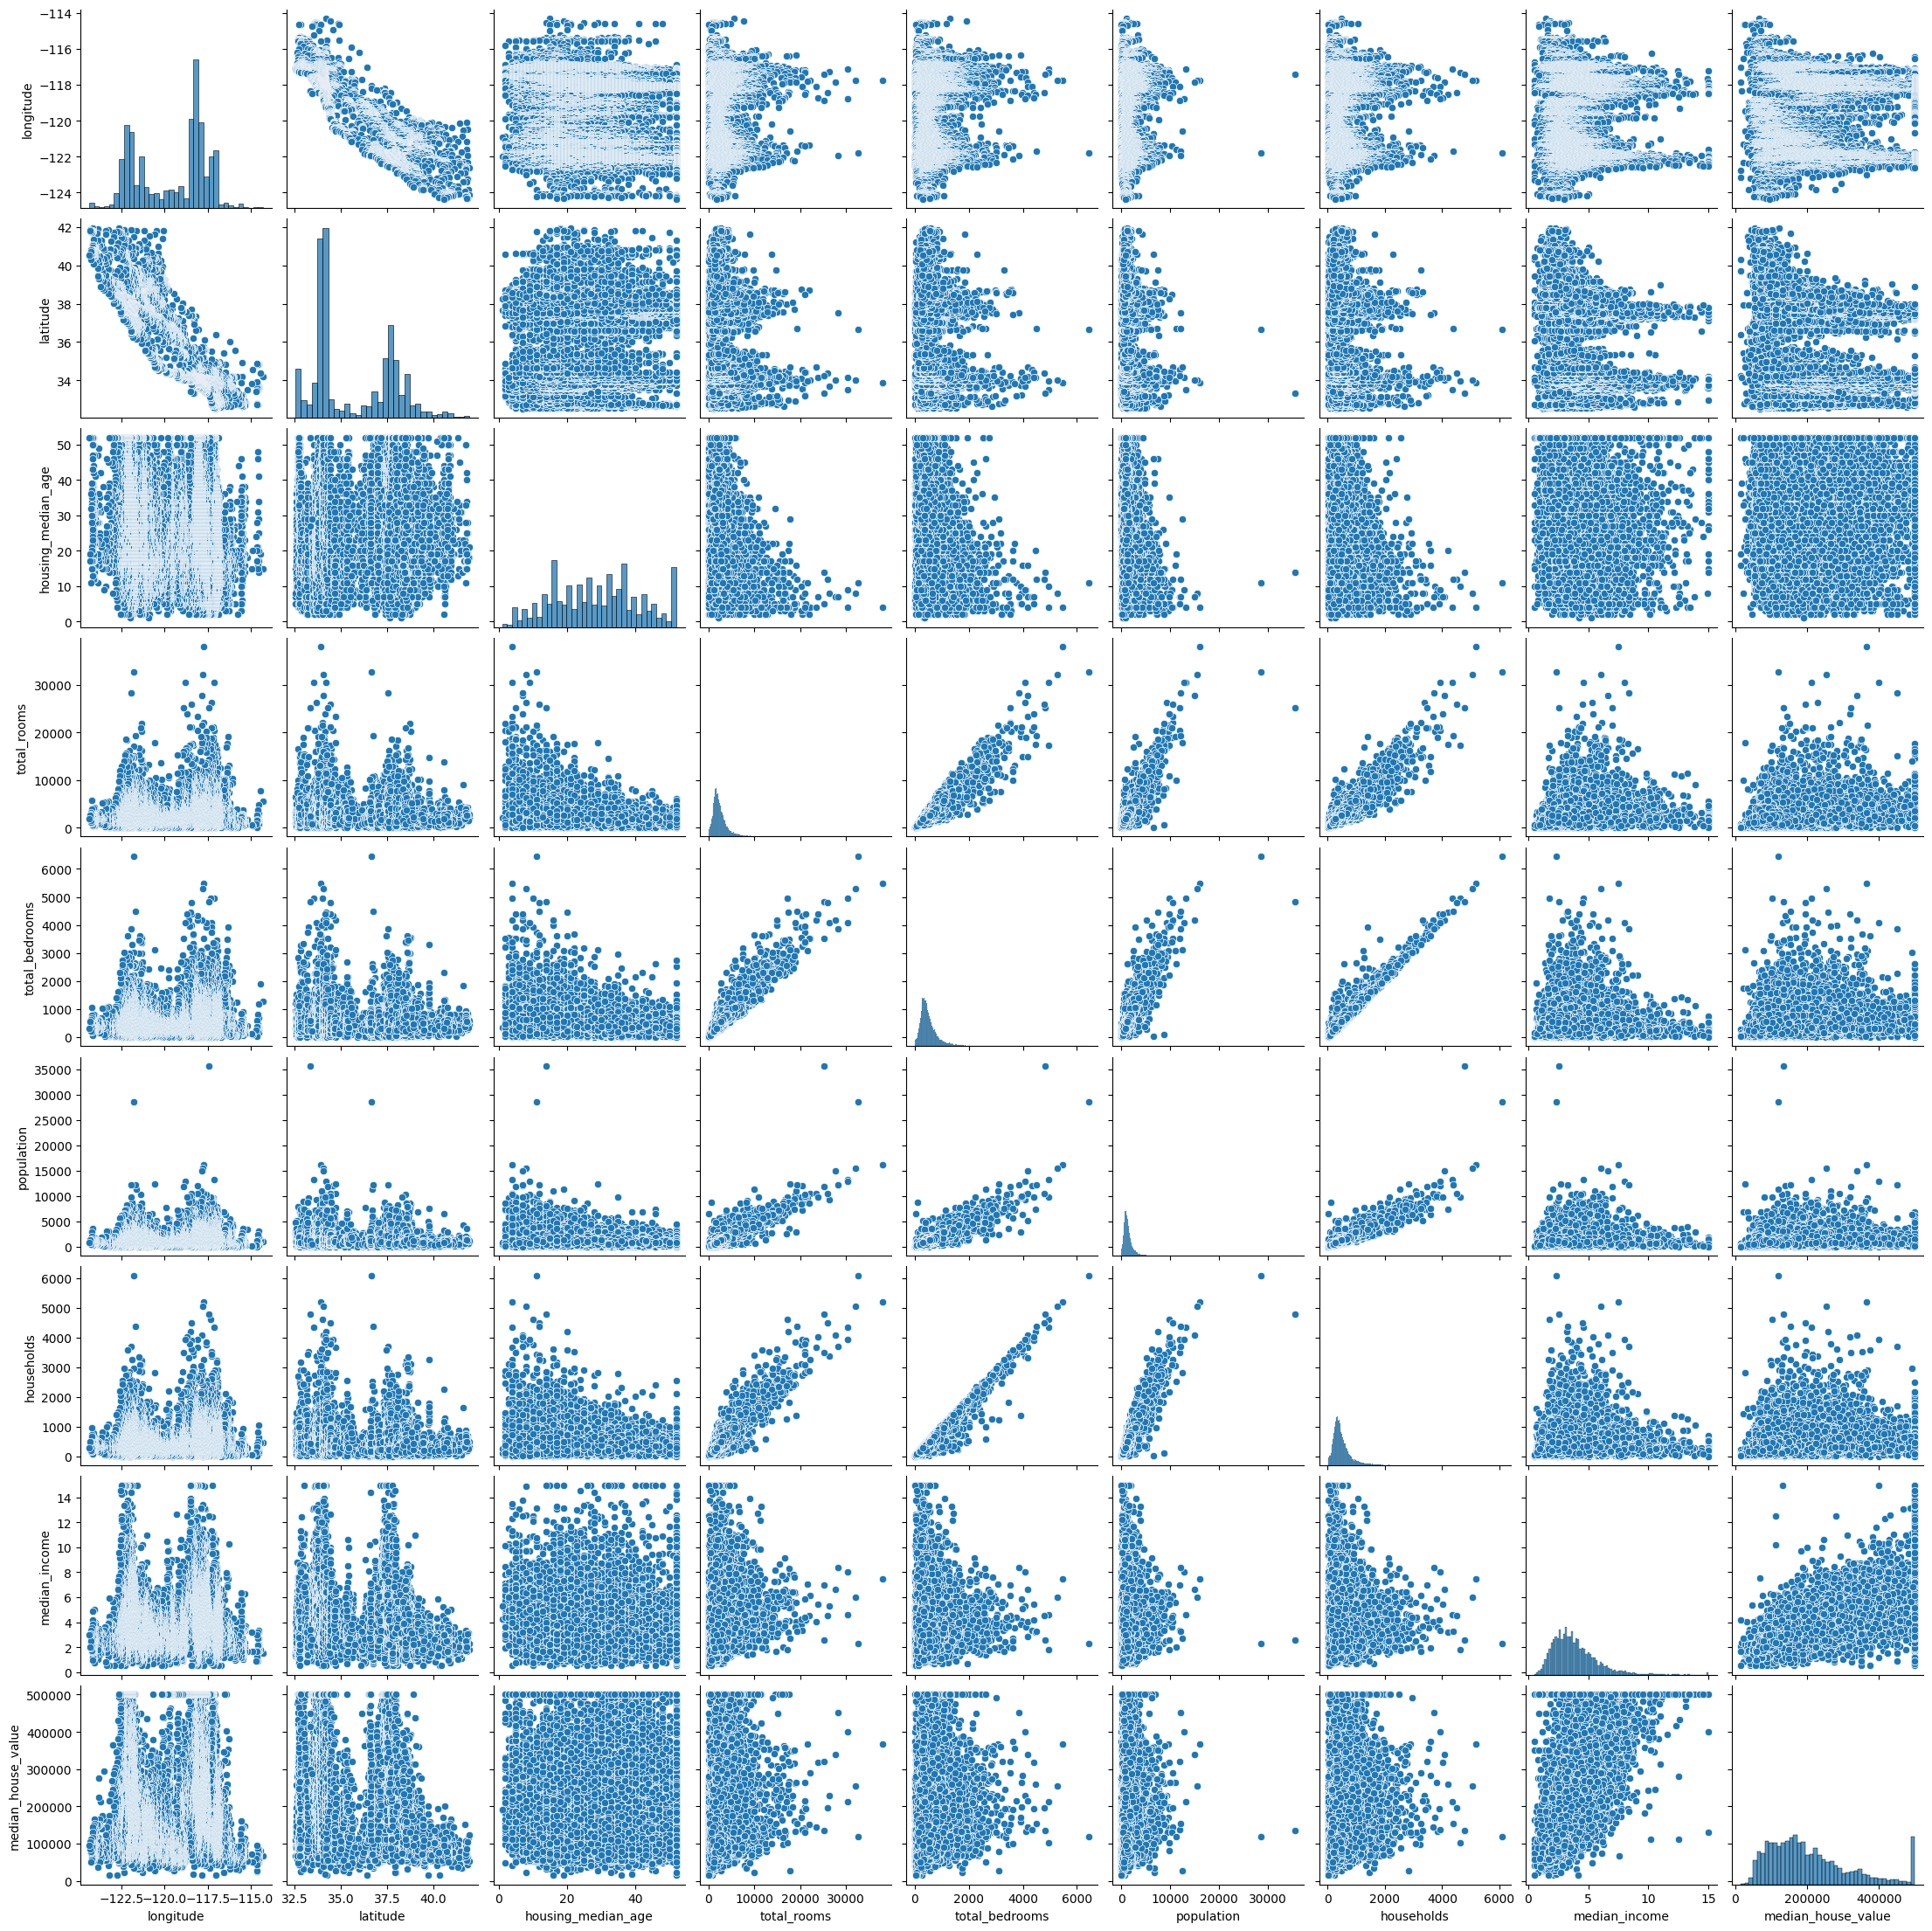

In [6]:
sns.pairplot(data)
plt.show()


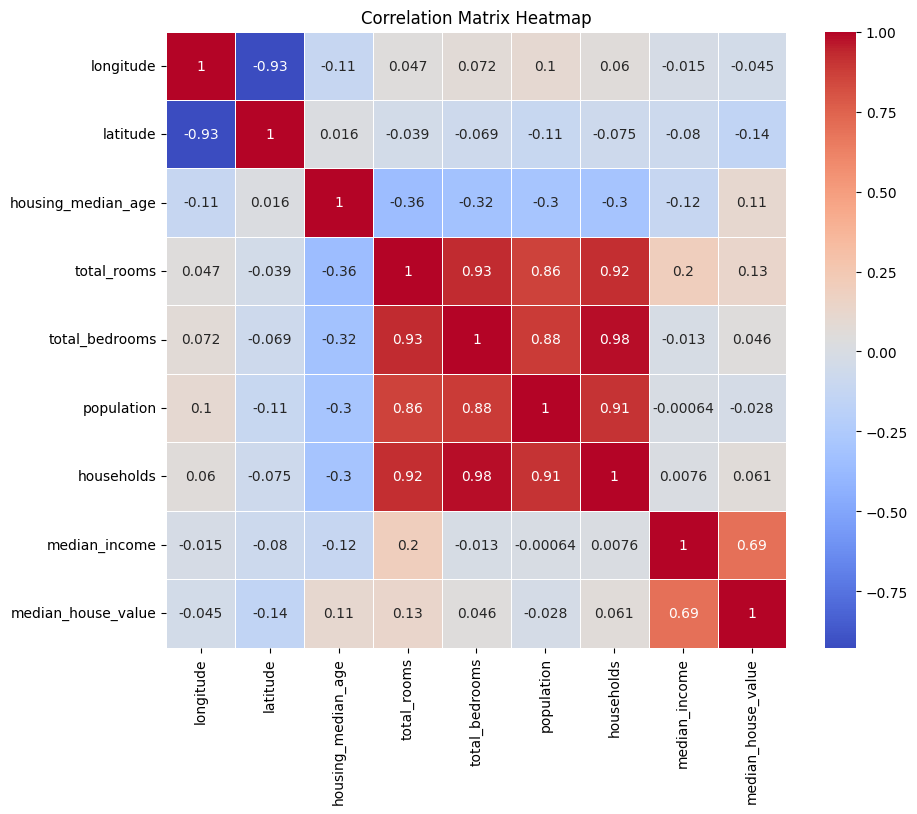

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [23]:
X = data.drop(columns='median_house_value')
y = data['median_house_value']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Coefficients:", model.coef_)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Coefficients: [-4.34652477e+04 -4.31063044e+04  1.13172438e+03 -8.84326062e+00
  1.13707973e+02 -3.56570769e+01  4.51475550e+01  4.01947263e+04]
Mean Squared Error: 4634658406.223264
R-squared: 0.6636396350243869


Part 2

In [25]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='median_house_value')
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (13600, 8)
X_test shape: (3400, 8)
y_train shape: (13600,)
y_test shape: (3400,)


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model)


LinearRegression()


In [34]:
model.fit(X_train, y_train)
print("Model has been trained.",model.intercept_)



Model has been trained. -3652253.1348448903


In [35]:
intercept = model.intercept_
slope = model.coef_
print("Intercept:", intercept)
print("Slope (Coefficients):", slope)

Intercept: -3652253.1348448903
Slope (Coefficients): [-4.34652477e+04 -4.31063044e+04  1.13172438e+03 -8.84326062e+00
  1.13707973e+02 -3.56570769e+01  4.51475550e+01  4.01947263e+04]


In [36]:
y_pred = model.predict(X_test)
print("Predicted values:", y_pred[:5])
print("Actual values:", y_test[:5].values)


Predicted values: [143770.39502963 398615.57056493  86341.10306742 148534.35353345
 147202.29808602]
Actual values: [142700. 500001.  61800. 162800.  90600.]


In [37]:
residuals = y_test - y_pred
print("Residuals (errors):", residuals[:5])


Residuals (errors): 10941     -1070.395030
5250     101385.429435
10292    -24541.103067
2266      14265.646467
6398     -56602.298086
Name: median_house_value, dtype: float64


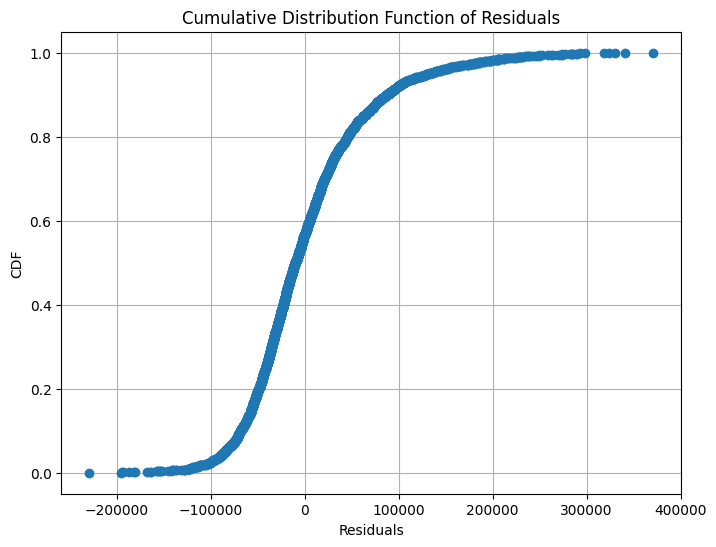

In [38]:
import numpy as np
import matplotlib.pyplot as plt
sorted_residuals = np.sort(residuals)
cdf = np.arange(1, len(sorted_residuals) + 1) / len(sorted_residuals)
plt.figure(figsize=(8, 6))
plt.plot(sorted_residuals, cdf, marker='o', linestyle='none')
plt.xlabel('Residuals')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Residuals')
plt.grid(True)
plt.show()


Part 3

In [39]:
import statsmodels.api as sm

# Add a constant to the independent variables matrix (for the intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Get the standard errors and t-statistics
standard_errors = model_sm.bse
t_statistics = model_sm.tvalues

print("Standard Errors:\n", standard_errors)
print("T-Statistics:\n", t_statistics)


Standard Errors:
 const                 77919.664788
longitude               889.126931
latitude                840.249852
housing_median_age       53.369405
total_rooms               0.978286
total_bedrooms            8.437617
population                1.287088
households                9.231879
median_income           413.161798
dtype: float64
T-Statistics:
 const                -46.872033
longitude            -48.885312
latitude             -51.301770
housing_median_age    21.205490
total_rooms           -9.039550
total_bedrooms        13.476314
population           -27.703684
households             4.890397
median_income         97.285680
dtype: float64


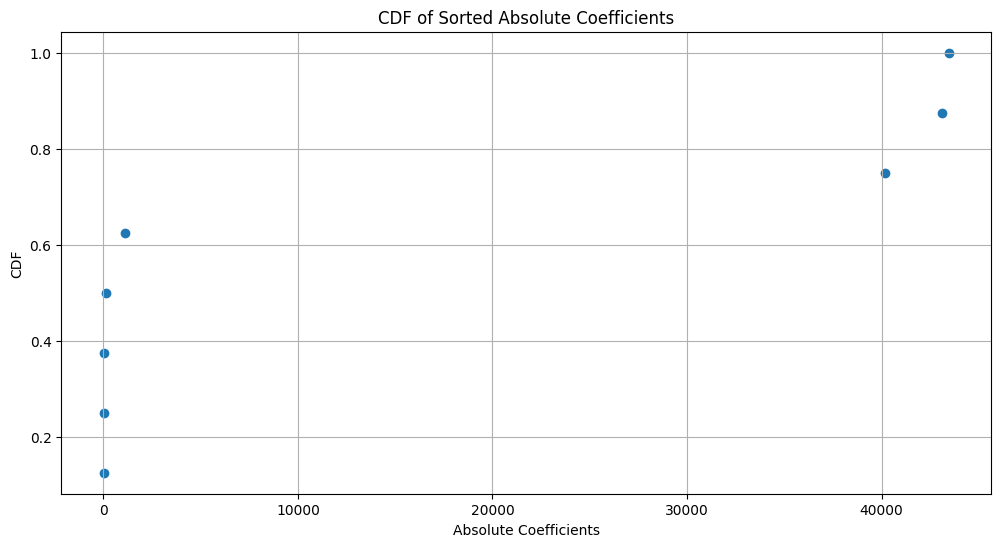

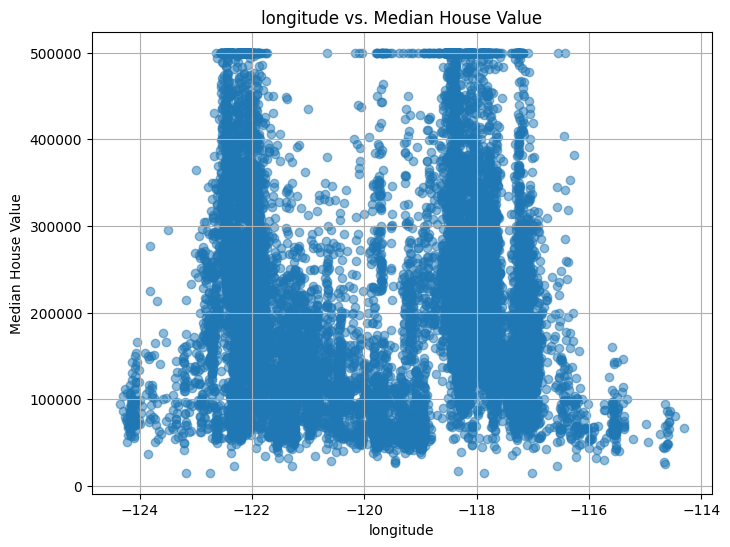

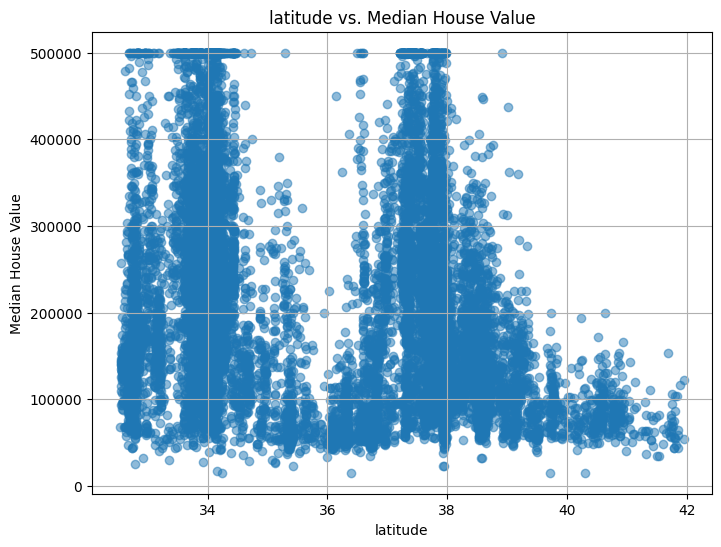

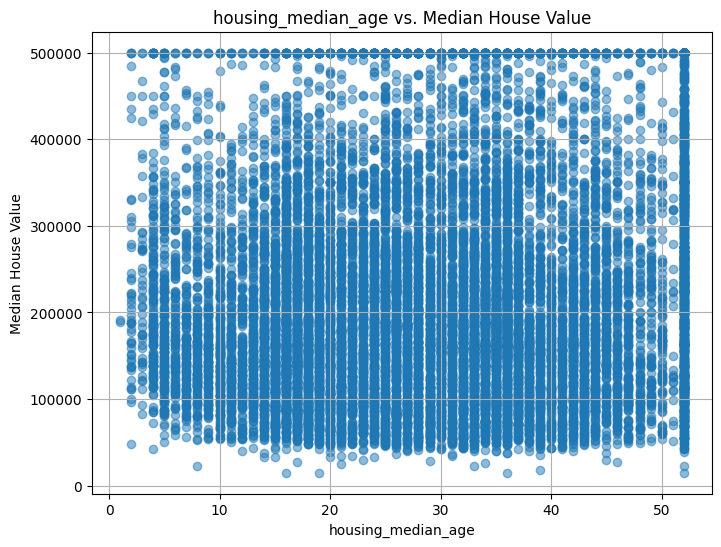

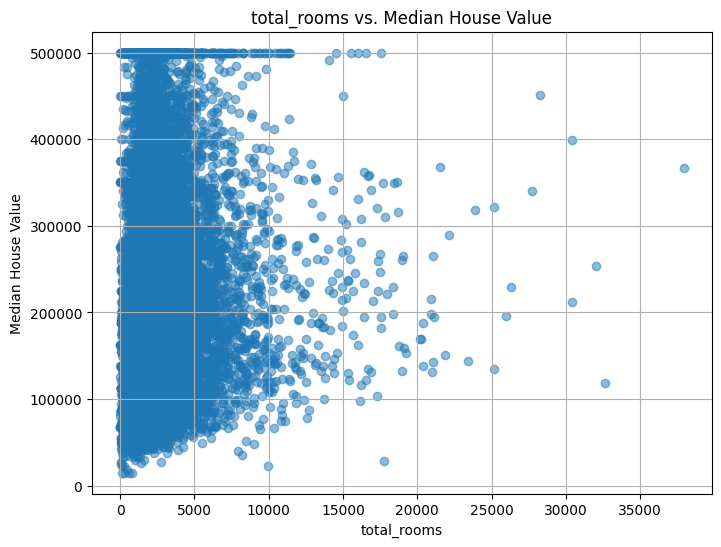

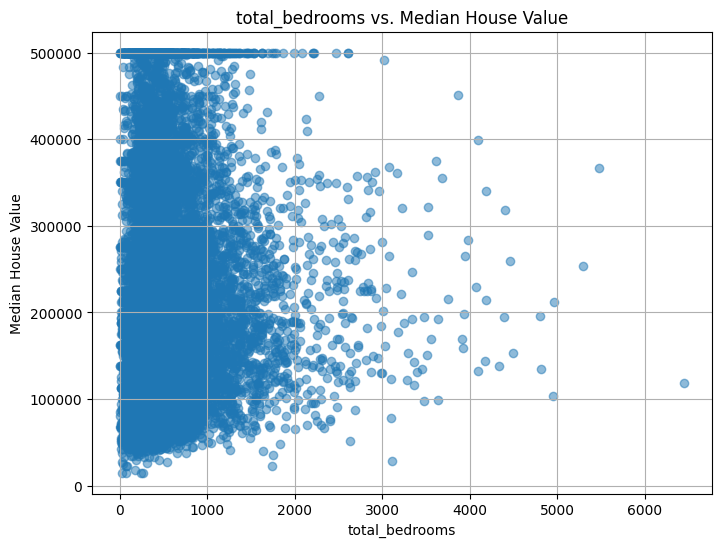

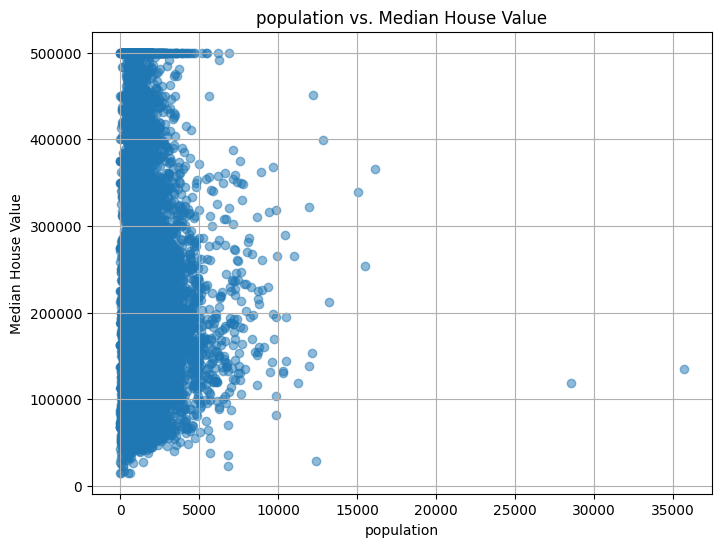

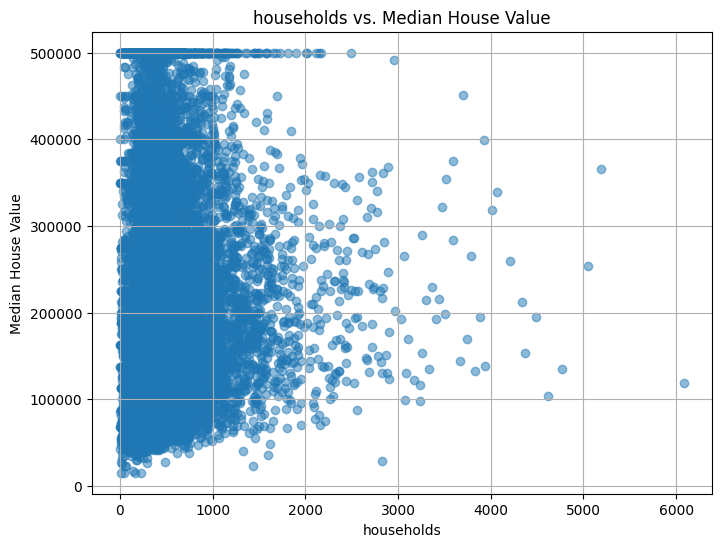

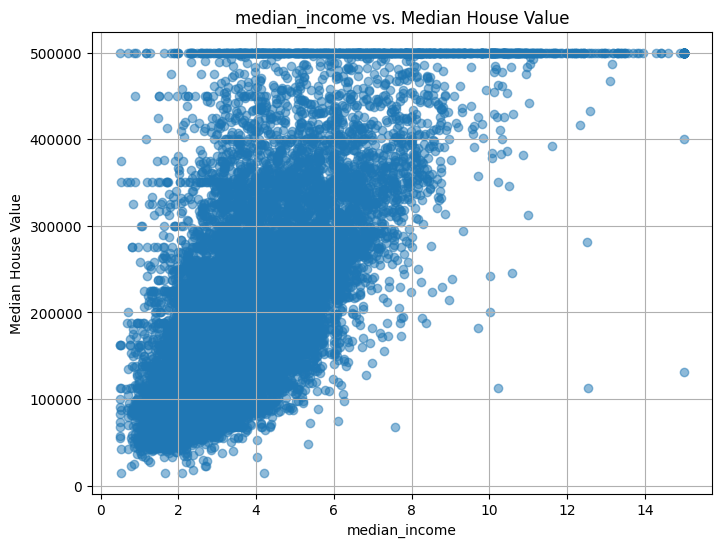

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Get coefficients and their names
coefficients = model.coef_
feature_names = X.columns

# Calculate the absolute values of the coefficients
abs_coefficients = np.abs(coefficients)

# Sort coefficients and their names based on their absolute values
sorted_indices = np.argsort(abs_coefficients)
sorted_features = feature_names[sorted_indices]
sorted_coefficients = abs_coefficients[sorted_indices]

# Compute CDF of the sorted coefficients
cdf = np.arange(1, len(sorted_coefficients) + 1) / len(sorted_coefficients)

# Plot scatter plot of coefficients
plt.figure(figsize=(12, 6))
plt.scatter(sorted_coefficients, cdf, marker='o')
plt.xlabel('Absolute Coefficients')
plt.ylabel('CDF')
plt.title('CDF of Sorted Absolute Coefficients')
plt.grid(True)
plt.show()

# Scatter plots for each feature vs. price
for feature in feature_names:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.title(f'{feature} vs. Median House Value')
    plt.grid(True)
    plt.show()


In [41]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.6636396350243869


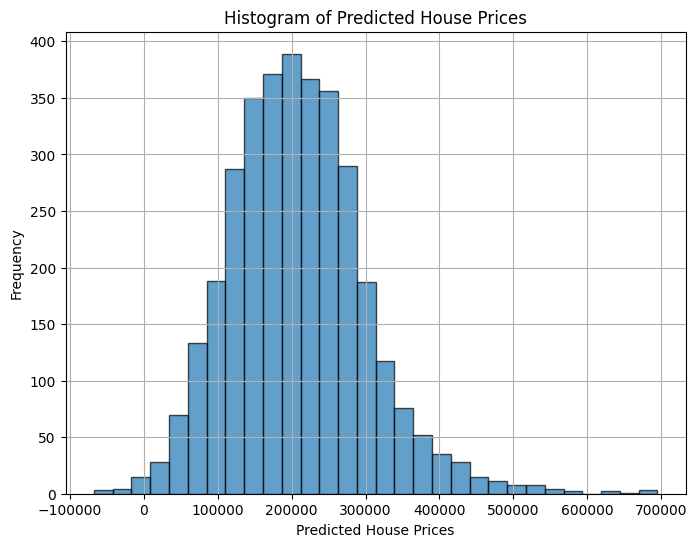

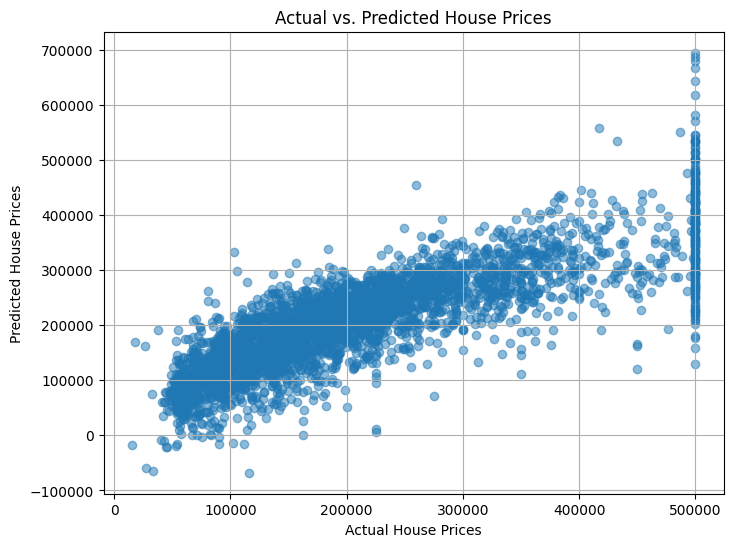

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted House Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted House Prices')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
sse = np.sum((y_test - y_pred) ** 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mae)
print("Sum of Squared Errors (SSE):", sse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 49983.47465122931
Sum of Squared Errors (SSE): 15757838581159.098
Root Mean Squared Error (RMSE): 68078.32552452553
R² Score: 0.6636396350243869


2.Compute the MinMax value between Observed price and Ex-
pected Price for the US Housing Data.

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Observed Prices Min: 14999.0, Max: 500001.0
Predicted Prices Min: 14999.0, Max: 500001.0
Normalized Observed Prices Min: 0.0, Max: 1.0
Normalized Predicted Prices Min: 0.0, Max: 1.0


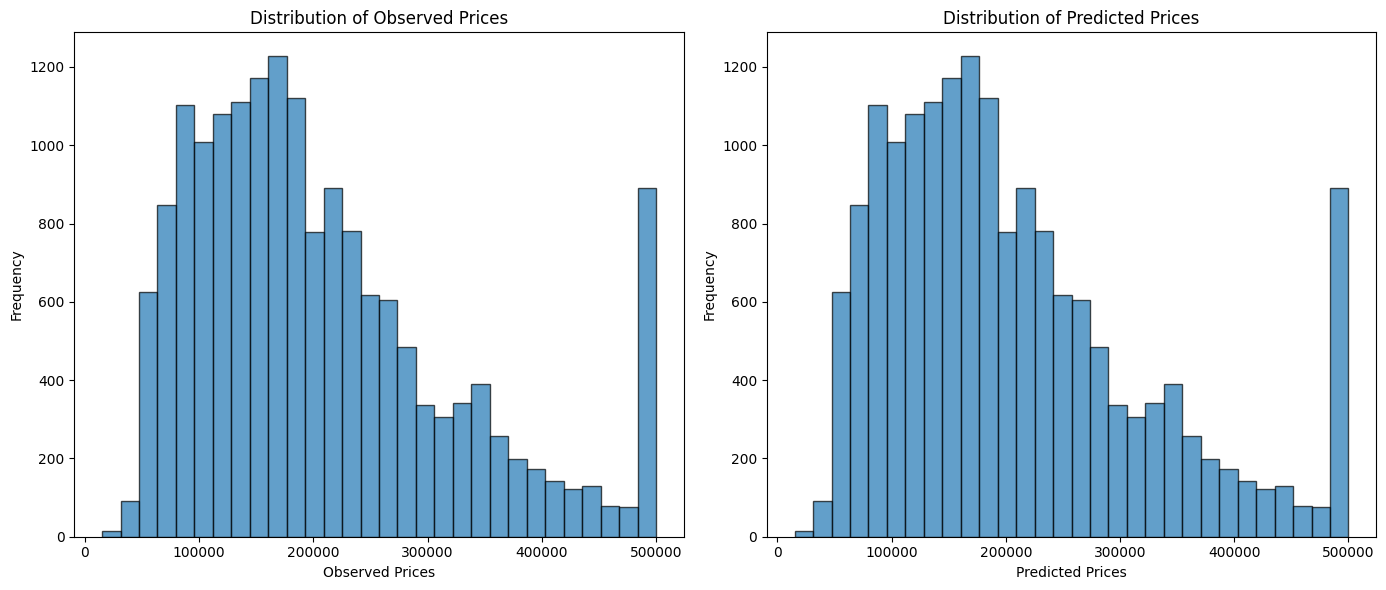

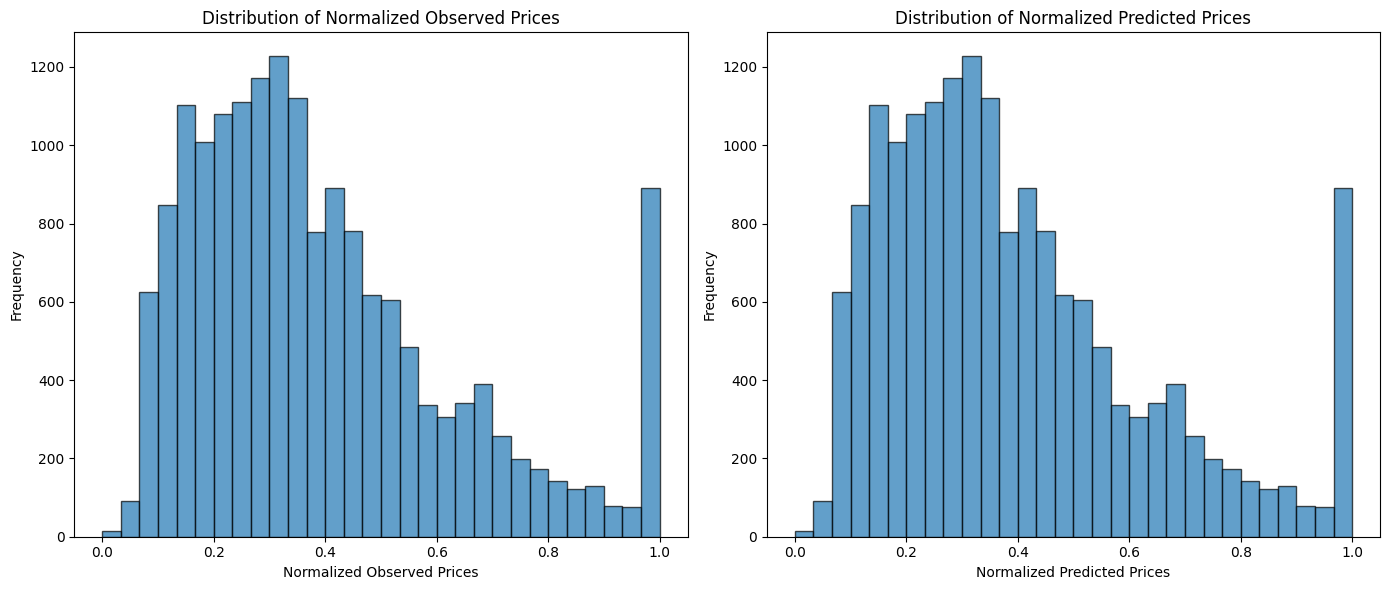

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
observed_prices = observed_prices
print(data.columns)
predicted_prices = data[predicted_price_col].values
def min_max_normalize(values):
    min_val = np.min(values)
    max_val = np.max(values)
    return (values - min_val) / (max_val - min_val)
normalized_observed_prices = min_max_normalize(observed_prices)
normalized_predicted_prices = min_max_normalize(predicted_prices)
print(f"Observed Prices Min: {np.min(observed_prices)}, Max: {np.max(observed_prices)}")
print(f"Predicted Prices Min: {np.min(predicted_prices)}, Max: {np.max(predicted_prices)}")

print(f"Normalized Observed Prices Min: {np.min(normalized_observed_prices)}, Max: {np.max(normalized_observed_prices)}")
print(f"Normalized Predicted Prices Min: {np.min(normalized_predicted_prices)}, Max: {np.max(normalized_predicted_prices)}")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(observed_prices, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Observed Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Observed Prices')
plt.subplot(1, 2, 2)
plt.hist(predicted_prices, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Prices')

plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(normalized_observed_prices, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Normalized Observed Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Observed Prices')
plt.subplot(1, 2, 2)
plt.hist(normalized_predicted_prices, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Normalized Predicted Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Predicted Prices')

plt.tight_layout()
plt.show()



---

